In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from utils import load, dump
from evaluate import eval, load_trained
from os import getcwd
from tqdm import tqdm
import torch

In [3]:
root = f'{getcwd()}/..'

In [15]:
data = load(f'{root}/data/prd_backtick-se_cowait_annotated.json')

def evaluate(name):
    
    predict, plot_progress = load_trained(f'{root}/../out/{name}')
    plot_progress()
    
    y_true = []
    y_pred = []

    for pr in tqdm(data):
        title = pr['title']
        pcat = predict(title)
        tcat = pr['category']

        y_true.append(tcat)
        y_pred.append(pcat)
    
    eval(y_true, y_pred)

## Let's evaluate the transformer classifiers

### CodeBERT base

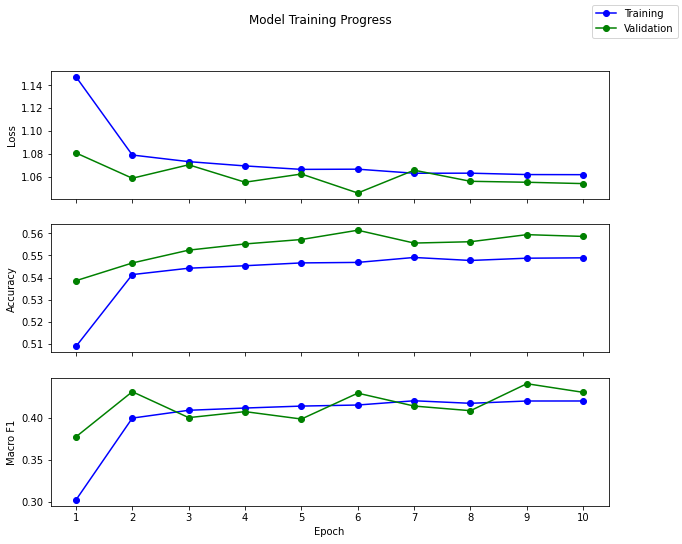

100%|██████████| 180/180 [02:00<00:00,  1.49it/s]

                precision    recall  f1-score   support

      fix-bugs       0.26      0.97      0.41        32
  new-features       0.40      0.04      0.07        49
 documentation       0.50      0.12      0.20         8
non-functional       0.80      0.47      0.59        91

      accuracy                           0.43       180
     macro avg       0.49      0.40      0.32       180
  weighted avg       0.58      0.43      0.40       180

[[31  1  0  0]
 [38  2  0  9]
 [ 4  1  1  2]
 [46  1  1 43]]


In [18]:
evaluate('codebert-base_model_385k_unbalanced_1e-03_solid.pt')

### BERTOverflow base

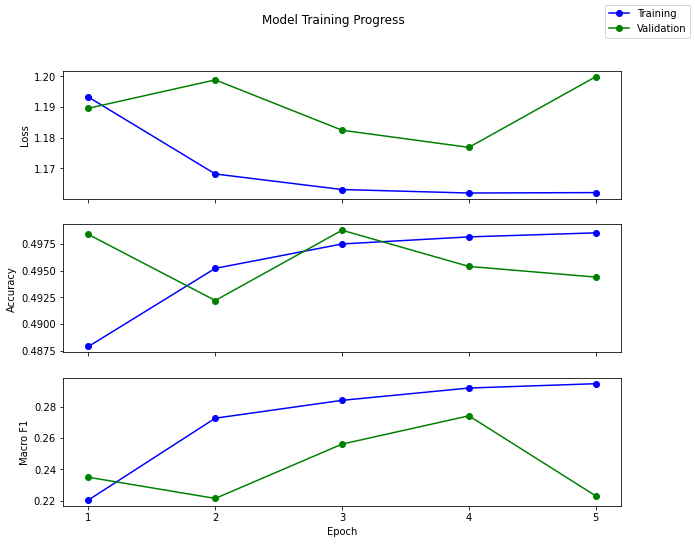

100%|██████████| 180/180 [02:00<00:00,  1.49it/s]

                precision    recall  f1-score   support

      fix-bugs       0.18      1.00      0.31        32
  new-features       0.00      0.00      0.00        49
 documentation       0.00      0.00      0.00         8
non-functional       0.50      0.02      0.04        91

      accuracy                           0.19       180
     macro avg       0.17      0.26      0.09       180
  weighted avg       0.29      0.19      0.08       180

[[32  0  0  0]
 [48  0  0  1]
 [ 7  0  0  1]
 [89  0  0  2]]



/home/shabo/anaconda3/envs/torch-cuda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shabo/anaconda3/envs/torch-cuda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shabo/anaconda3/envs/torch-cuda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

In [22]:
evaluate('BERTOverflow_model_385k_unbalanced_1e-03_solid.pt')